<a href="https://colab.research.google.com/github/SunnyDahitJ/Computer_Vision/blob/main/CV__practical_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

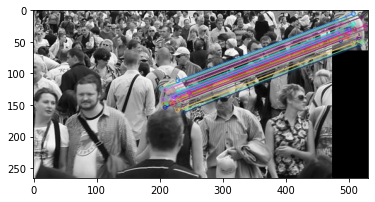

(<matplotlib.image.AxesImage at 0x7f8a0fe37c50>, None)

In [4]:
import cv2 
import matplotlib.pyplot as plt
# %matplotlib inline
# read images
img1 = cv2.imread('/content/drive/MyDrive/Computer_vision/Input images/pra_2.jpeg') #'SIFTimg1.jpg')  #'Kepala_Buddha_3.png')  
img2 = cv2.imread('/content/drive/MyDrive/Computer_vision/Input images/temp2.PNG')  #SIFTimg2.jpg')  #'Kepala_Buddha_4.png') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()




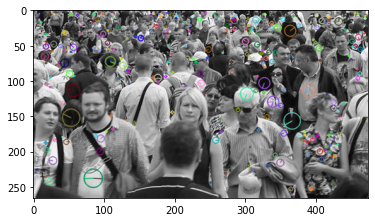

(<matplotlib.image.AxesImage at 0x7f8a0f2d4310>, None)

In [9]:
#SURF Algorithm
import numpy as np
import cv2 
import matplotlib.pyplot as plt
# %matplotlib inline
#Read the image
img = cv2.imread('/content/drive/MyDrive/Computer_vision/Input images/pra_2.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the features (i.e. keypoints) and feature descriptors in the image
surf = cv2.SIFT_create(400)
kp, des = surf.detectAndCompute(img,None)
#Draw circles to indicate the location of features and the feature's orientation
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#Save the image
plt.imshow(img),plt.show()
#cv.imwrite('surf_with_features_chessboard.jpg',img)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8a0fdd62d0>,
 Text(0.5, 1.0, 'Image with Corner'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

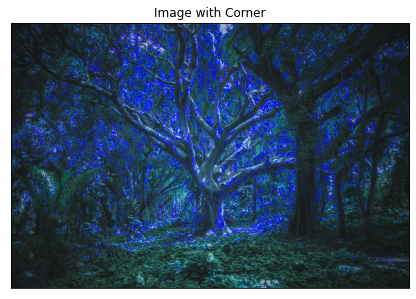

In [11]:
# Python program to illustrate corner detection with
# Harris Corner Detection Method
# organizing imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# path to input image specified and 
# image is loaded with imread command
image = cv2.imread('/content/drive/MyDrive/Computer_vision/Input images/pract_2_img.jpg')
# convert the input image into
# grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#modify the data type
#setting to 32-bit floating point
operatedImage = np.float32(operatedImage)
# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)
# Results are marked through the dilated corners
dest = cv2.dilate(dest, None)
# Reverting back to the original image,
# with optimal threshold value
image[dest > 0.01 * dest.max()]=[0, 0, 255]
# The window showing output image with corners
plt.figure(figsize=(50,50), constrained_layout=False)
plt.subplot(161), plt.imshow(image), plt.title("Image with Corner"), plt.xticks([]), plt.yticks([])
